# Project 8: Personal Data & Visualization

## Your name: Ruth Iiyambo 

### Your collaborators: Class TA

### Your sources:  https://pandas.pydata.org/docs/index.html

Due date: Sunday November 19 at 11:59 pm

In [16]:
# Import the packages we need

# Handling dates and times
from datetime import datetime
from matplotlib import pyplot as plt

# DataFrames
import pandas as pd
import numpy as npe
import seaborn as sns

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)


## Part 0: Setting up a GitHub repository

## Part 1: Extracting timestamps from your personal data

In [17]:
# Creating a dataframe
Rut_data = pd.read_csv('Ruth_timestamps.csv')
Rut_data

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [18]:
# Converting to datetime
Rut_data['endTime'] = pd.to_datetime(Rut_data['ts'])
Rut_data['endTime'] 

0       2023-06-19 02:58:03
1       2023-06-19 03:03:32
2       2023-06-19 03:10:21
3       2023-06-19 03:47:41
4       2023-06-19 03:54:56
                ...        
12518   2023-10-26 23:45:12
12519   2023-10-26 23:47:49
12520   2023-10-26 23:48:28
12521   2023-10-26 23:49:15
12522   2023-10-26 23:49:16
Name: endTime, Length: 12523, dtype: datetime64[ns]

## Part 2: Analyzing timestamp data for patterns

In [19]:
# Creating a dataframe
Aud_data = pd.read_csv('audrey_timestamps.csv')
Aud_data

,Unnamed: 0,endTime
0,0,2022-10-18 01:12
1,1,2022-10-18 01:15
2,2,2022-10-18 01:19
3,3,2022-10-18 01:23
4,4,2022-10-18 16:58
...,...,...
19954,9954,2023-10-18 19:42
19955,9955,2023-10-18 19:42
19956,9956,2023-10-18 19:45
19957,9957,2023-10-18 19:48


In [20]:
Aud_data['endTime'] = pd.to_datetime(Aud_data['endTime'])
Aud_data['endTime'] 

0       2022-10-18 01:12:00
1       2022-10-18 01:15:00
2       2022-10-18 01:19:00
3       2022-10-18 01:23:00
4       2022-10-18 16:58:00
                ...        
19954   2023-10-18 19:42:00
19955   2023-10-18 19:42:00
19956   2023-10-18 19:45:00
19957   2023-10-18 19:48:00
19958   2023-10-18 19:52:00
Name: endTime, Length: 19959, dtype: datetime64[ns]

### Using pandas.diff() , make a new column that tells you the time since between a timestamp and the previous one 

(for example, row 2 will have the time between the timestamp in row 2 and row 1).(TIP: Make sure your timestamps are sorted in chronological order before you do this!)

In [21]:
Aud_data['end_diff'] = Aud_data['endTime'].diff()
Aud_data['end_diff']

0                   NaT
1       0 days 00:03:00
2       0 days 00:04:00
3       0 days 00:04:00
4       0 days 15:35:00
              ...      
19954   0 days 00:02:00
19955   0 days 00:00:00
19956   0 days 00:03:00
19957   0 days 00:03:00
19958   0 days 00:04:00
Name: end_diff, Length: 19959, dtype: timedelta64[ns]

### Answer: What is the longest time between timestamps? What is the average time between timestamps?

In [22]:
Aud_data['end_diff'].max() #longest time between timestamps

Timedelta('11 days 04:15:00')

In [23]:
Aud_data['end_diff'].mean() #average time between timestamps

Timedelta('0 days 00:26:23.485319170')

For Audrey, the longest time between timestamps is 11 days and the average between two timestamps is 26 minutes 23 seconds 

### Answer: What is the day with the most timestamps? How many events (timestamps) were on that day? 

(TIP: Once you have done .to_datetime, you now have a Timestamp object, which has all kinds of cool properties and methods -- such as returning the day or the month. Find out more hereLinks to an external site.. You might also want to use DatetimeIndexLinks to an external site.. For example, you can create a new column that is the day by doing: df['days'] = pd.DatetimeIndex(df['timestamps']).day )

In [24]:
Aud_data["date"]=pd.DatetimeIndex(Aud_data["endTime"]).date
Aud_data["date"].value_counts()

2023-04-19    406
2023-02-18    343
2023-09-02    323
2023-05-12    264
2023-01-22    226
             ... 
2022-11-24      1
2023-08-10      1
2023-10-03      1
2022-11-18      1
2023-08-21      1
Name: date, Length: 300, dtype: int64

In [25]:
time=Aud_data['endTime'].dt.time
time

0        01:12:00
1        01:15:00
2        01:19:00
3        01:23:00
4        16:58:00
           ...   
19954    19:42:00
19955    19:42:00
19956    19:45:00
19957    19:48:00
19958    19:52:00
Name: endTime, Length: 19959, dtype: object

The day with the most time stamps is 19th of April 2023 and Audrey had 406 timestamps.

### Answer: What is the month with the most timestamps? How many events (timestamps) were on that month?

In [26]:
#Extracting month and year from 'endTime' and creating a new column 'month_year
Aud_data['month_year'] = Aud_data['endTime'].dt.to_period('M')
Aud_data

,Unnamed: 0,endTime,end_diff,date,month_year
0,0,2022-10-18 01:12:00,NaT,2022-10-18,2022-10
1,1,2022-10-18 01:15:00,0 days 00:03:00,2022-10-18,2022-10
2,2,2022-10-18 01:19:00,0 days 00:04:00,2022-10-18,2022-10
3,3,2022-10-18 01:23:00,0 days 00:04:00,2022-10-18,2022-10
4,4,2022-10-18 16:58:00,0 days 15:35:00,2022-10-18,2022-10
...,...,...,...,...,...
19954,9954,2023-10-18 19:42:00,0 days 00:02:00,2023-10-18,2023-10
19955,9955,2023-10-18 19:42:00,0 days 00:00:00,2023-10-18,2023-10
19956,9956,2023-10-18 19:45:00,0 days 00:03:00,2023-10-18,2023-10
19957,9957,2023-10-18 19:48:00,0 days 00:03:00,2023-10-18,2023-10


In [27]:
#Since we have data for 2022 and 2023, count occurrences of each month-year
monthly_counts = Aud_data['month_year'].value_counts()
monthly_counts

2023-02    2926
2023-04    2418
2023-05    2283
2023-03    2144
2023-01    2002
2023-09    1968
2023-10    1567
2022-11    1199
2023-06     927
2022-12     920
2023-08     715
2022-10     588
2023-07     302
Freq: M, Name: month_year, dtype: int64

In [28]:
max_month = monthly_counts.idxmax()
max_count = monthly_counts.max()

print(f"The month with the most timestamps is {max_month}")
print(f"Number of timestamps in this month is {max_count}")

The month with the most timestamps is 2023-02
Number of timestamps in this month is 2926


For Audrey, the month with the most timestamps is February 2023 and the timestamps in this month is 2926


### 6. Analyze: Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data). 

What can they tell you about the data?

Text(0.5, 1.0, "Audrey's Spotify TimeStamp Data")

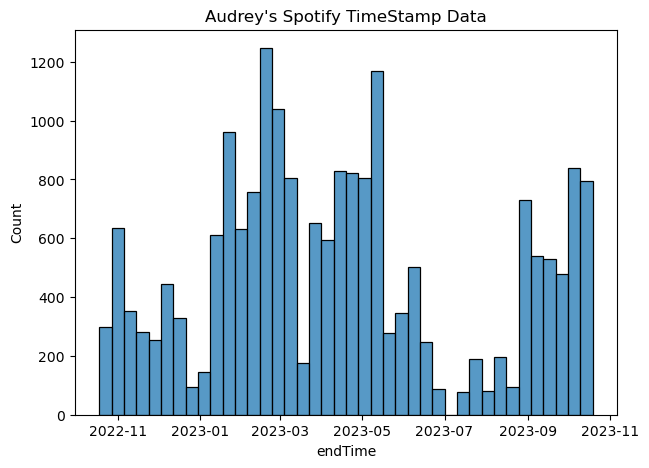

In [29]:
plt.figure(figsize=(7, 5))
sns.histplot(data=Aud_data["endTime"])
plt.title("Audrey's Spotify TimeStamp Data")

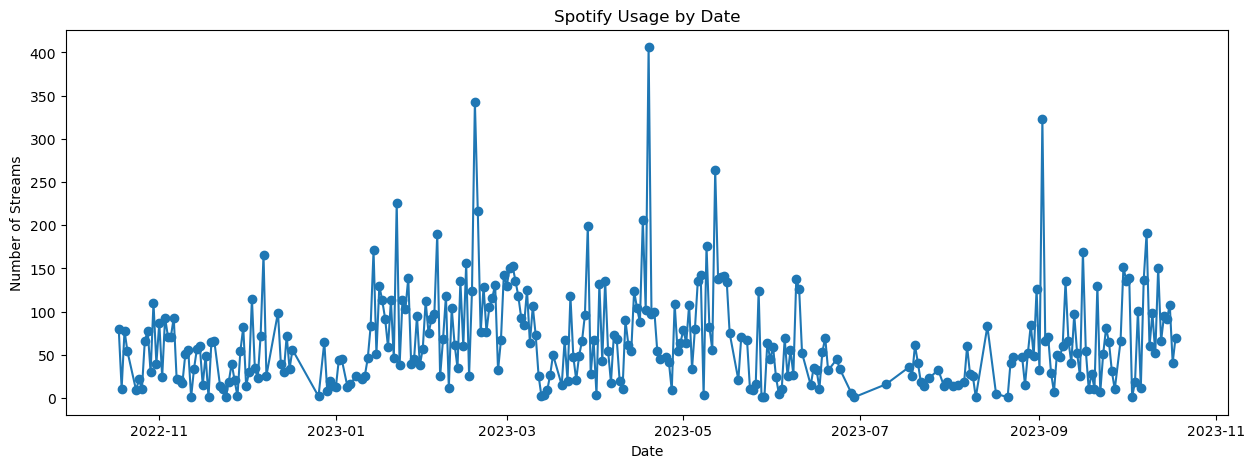

In [50]:
Aud_data['month_year'] = Aud_data['endTime'].dt.date

# Count the number of occurrences per date
daily_counts = Aud_data['month_year'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
daily_counts.plot(kind='line', marker='o')
plt.title('Spotify Usage by Date')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.show()

This graph shows to the daily usage of Spotify over a span of time. It counts the number of streams per day, ranging from November 2022 to November 2023. There are occasional spikes in activity indicating days with high number of streams. Audrey might have been playing music at a special events, or been on a long drive playing music.

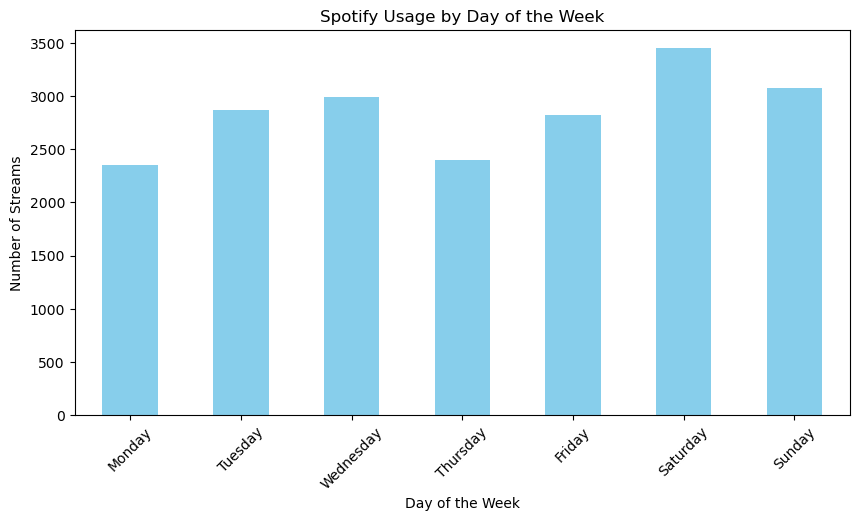

In [51]:
Aud_data['weekday'] = Aud_data['endTime'].dt.day_name()

# Plotting sequence
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Aud_data['weekday'] = pd.Categorical(Aud_data['weekday'], categories=ordered_days, ordered=True)

weekday_counts = Aud_data['weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Spotify Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Streams')
plt.show()

The graph shows the number of Spotify streams for each day of the week. On Wednesday Audrey has the highest number of streams, followed by Friday, and then Monday. The other days show fewer streams, with Sunday being the least.

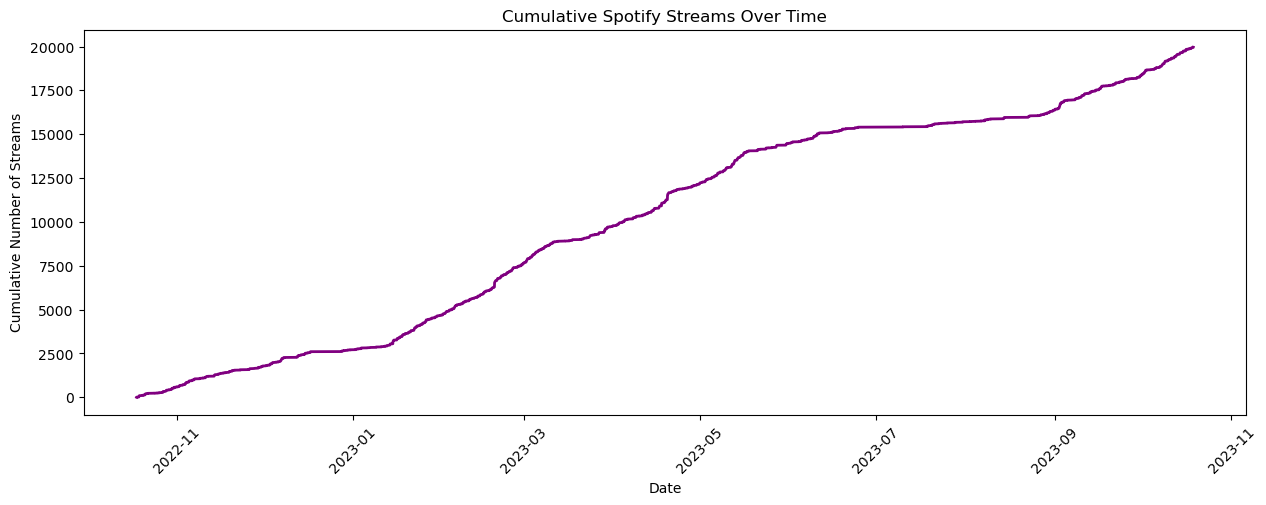

In [53]:
data_sorted = Aud_data.sort_values(by='endTime')

data_sorted['cumulative_streams'] = range(1, len(data_sorted) + 1)

plt.figure(figsize=(15, 5))
plt.plot(data_sorted['endTime'], data_sorted['cumulative_streams'], marker='', color='purple', linewidth=2)
plt.title('Cumulative Spotify Streams Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Streams')
plt.xticks(rotation=45)
plt.show()

From this graph we can tell that Audrey's spotify usage has been increasing over the observed time period. The pattern of growth does not appear to be linear, which might mirror her schedule showing the times she is free to listen to music most. 

### 7. Answer: What do you think the source of this data is? 

Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

The initial clue towards understanding the data was the interval between timestamps. If the timestamps were logged each time a change occurred, similar to how the class location data was recorded whenever there was a shift in location, then it seemed reasonable to apply the same logic to Audrey's data, assuming it documented each instance of change. Initially, I speculated that the source might be Netflix, but the small durations between timestamps led me to reconsider. I then thought of a platform with potentially shorter session lengths, such as YouTube or Spotify, was more likely. 

### 8. Exchange your analysis with your partner. Read your partner's analysis -- does it seem accurate? 

Did they guess the correct data source (or type of data source)?

This was Audrey's guess: For the days that Ruth has the most timestamps, I think it's interesting that it was also a Wednesday which is the day of the week witht he most recorded timestamp data. I checked 6 September 2023 on the Whitman Events and general public news but there doesn't seem to be much happening. I think location data here and social media data could help a lot as there's a potential ruth made some social media updates or was in a certain location like maybe the library to conduct the browsings. Whereas for the month 9 that Ruth has most timestamps, I think the schedule data and possibly walking tracker data could help figure out why there's a lot of timestamp on this day. If the data is actually browshing history, then there should definitely be less walking data as it's high chance that Ruth stayed in one place to conduct browsing.

### 9. For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. 

What other data might help you figure this out?

Audrey was on a trip for 11 days which explains the 11 day longest time without timestamp. I also learned that Audrey likes music maybe not as much as me but we definitely love Spotify.

### First, discuss your results together -- what did you learn about yourself and your partner through doing this?

Learn about Partner Audrey: I learned that Ruth really loves listening to music and she seems to always have music running! Turns out, Ruth gets very distracted but because the song rhythm it helps Ruth follow what her brain is thinking when working. So, I found that we have this in common that we focus more with music on.

About myslef, I learned that I should not lose my airpods because I listen to music so much.

## Part 3: Make a combined visualization

## Part 3.1: My processed data from Audrey 

In [74]:
# Read CSV
ruth = pd.read_csv("Ruth_timestamps.csv")

# Convert to datetime and sort
ruth["ts"] = pd.to_datetime(ruth["ts"])
ruth.sort_values(by="ts")

# Examine
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [75]:
# Format the datetime without the timezone offset
ruth["ts"] = pd.to_datetime(ruth["ts"].dt.strftime("%Y-%m-%d %H:%M:%S")) # the original data had a different ts format
ruth["ts"].to_csv("Ruth_timestamps.csv")
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [76]:
ruth["timeDifference"] = ruth["ts"].diff()
ruth

,Unnamed: 0,ts,timeDifference
0,0,2023-06-19 02:58:03,NaT
1,1,2023-06-19 03:03:32,0 days 00:05:29
2,2,2023-06-19 03:10:21,0 days 00:06:49
3,3,2023-06-19 03:47:41,0 days 00:37:20
4,4,2023-06-19 03:54:56,0 days 00:07:15
...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39
12521,12521,2023-10-26 23:49:15,0 days 00:00:47


In [77]:
r_longest = ruth["timeDifference"].max()
r_mean = ruth["timeDifference"].mean()
print("The longest time between timestamps for Ruth is {} and the average time between timestamps is {}".format(r_longest, r_mean))

The longest time between timestamps for Ruth is 2 days 18:20:10 and the average time between timestamps is 0 days 00:14:56.076744928


In [78]:
ruth["date"] = pd.DatetimeIndex(ruth["ts"]).date 
ruth

,Unnamed: 0,ts,timeDifference,date
0,0,2023-06-19 02:58:03,NaT,2023-06-19
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19
...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26


In [79]:
r_date_counts = ruth["date"].value_counts()
r_date_counts

2023-09-06    730
2023-08-03    416
2023-08-02    386
2023-09-08    362
2023-10-19    316
             ... 
2023-07-30      7
2023-06-21      4
2023-08-25      3
2023-10-08      2
2023-07-03      2
Name: date, Length: 125, dtype: int64

In [80]:
ruth["ts_count_per_date"] = ruth.groupby("date")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15
...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37


In [81]:
r_most_ts_date = ruth["ts_count_per_date"].idxmax()
r_date_ts_count = ruth["ts_count_per_date"].max()
most_ts_date = ruth.loc[r_most_ts_date, "date"]
print("The day with the most timestamps for Ruth's data is {} with {} events (timestamps) on this day.".format(most_ts_date, r_date_ts_count))

The day with the most timestamps for Ruth's data is 2023-09-06 with 730 events (timestamps) on this day.


In [82]:
ruth["month"] = pd.DatetimeIndex(ruth["ts"]).month
ruth 

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6
...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10


In [83]:
r_month_counts = ruth["month"].value_counts()
r_month_counts

9     4218
10    2852
8     2683
7     2322
6      448
Name: month, dtype: int64

In [84]:
ruth["ts_count_per_month"] = ruth.groupby("month")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6,448
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6,448
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6,448
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6,448
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [89]:
r_most_ts_month = ruth["ts_count_per_month"].idxmax()
r_month_ts_count = ruth["ts_count_per_month"].max()
most_ts_month = ruth.loc[r_most_ts_month, "month"]
print("The month with the most timestamps for Ruth's data is {} with {} events (timestamps) on this month.".format(most_ts_month,r_month_ts_count ))

The month with the most timestamps for Ruth's data is 9 with 4218 events (timestamps) on this month.


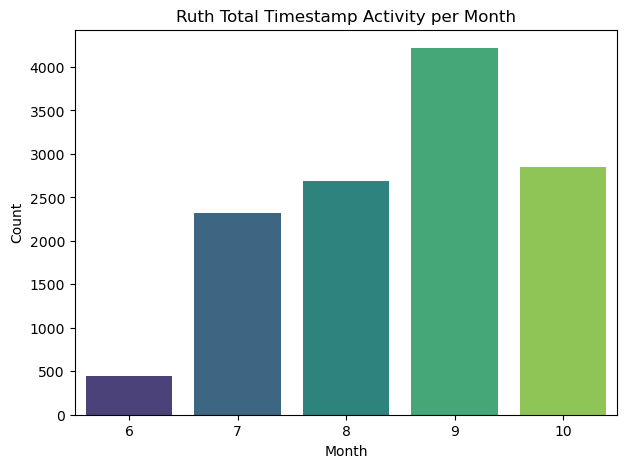

In [90]:
plt.figure(figsize=(7, 5))
sns.barplot(x="month", y="ts_count_per_month", data=ruth, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [91]:
# Extract the day of the week from the timestamp
ruth["day_of_week"] = ruth["ts"].dt.day_name()

# Count the number of events for each day of the week
r_day_counts = ruth["day_of_week"].value_counts()

# Order the days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
r_day_counts = r_day_counts.reindex(days_order)
r_day_counts

Monday       1270
Tuesday      2089
Wednesday    2393
Thursday     2288
Friday       1689
Saturday     1833
Sunday        961
Name: day_of_week, dtype: int64

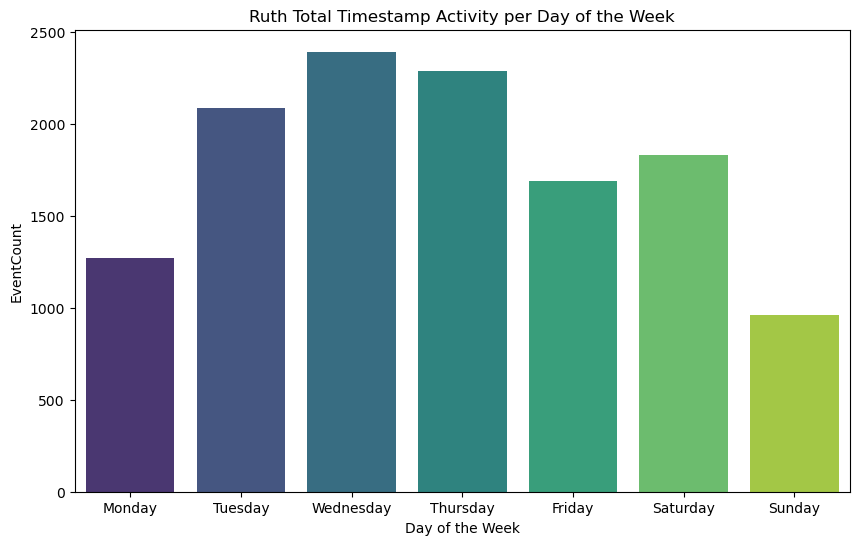

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x=r_day_counts.index, y=r_day_counts.values, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("EventCount")
plt.show()

In [93]:
# Extract the hour from the timestamp
ruth["hour"] = ruth["ts"].dt.hour

# Create column for ts count
# Group by 'hour' and count occurrences of 'ts'
ruth["ts_count_per_hour"] = ruth.groupby(["date", "hour"])["ts"].transform("count")

# Calculate the mean ts_count_per_hour for each unique hour
hourly_mean = ruth.groupby("hour")["ts_count_per_hour"].mean().reset_index()
hourly_mean

,hour,ts_count_per_hour
0,0,54.438975
1,1,40.133612
2,2,25.070404
3,3,55.812983
4,4,88.324786
5,5,77.103718
6,6,49.430859
7,7,45.863436
8,8,24.435897
9,9,30.136364


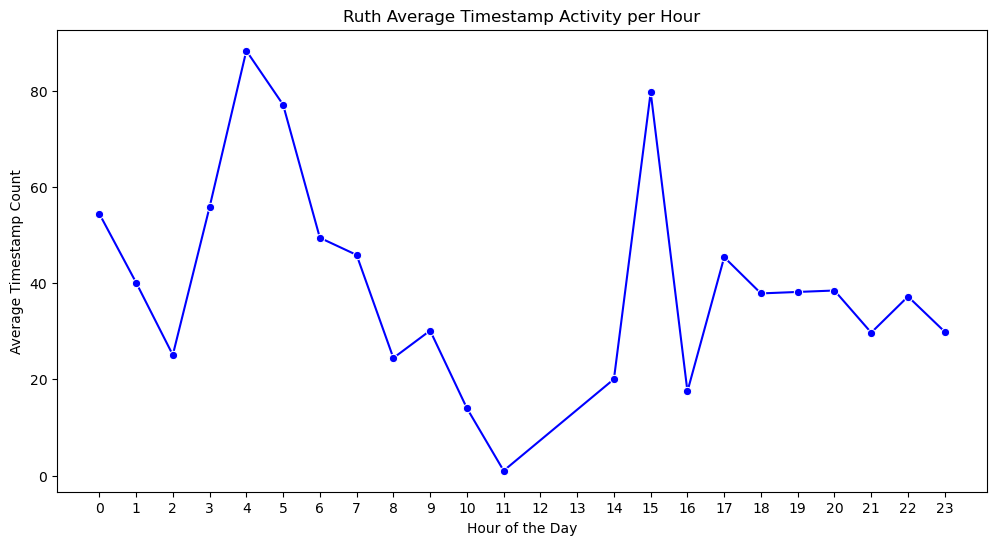

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="ts_count_per_hour", data=hourly_mean, marker='o', color='b')
plt.title("Ruth Average Timestamp Activity per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Timestamp Count")
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

## Part 3.2 Make a combined visualization

In [98]:
# Perform an inner merge on the 'date' column
df_audrey_ruth = pd.merge(ruth, Aud_data, on='date', how='inner')
df_audrey_ruth

,Unnamed: 0_x,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month,day_of_week,hour,ts_count_per_hour,Unnamed: 0_y,endTime,end_diff,month_year,weekday
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,5219,2023-06-19 04:22:00,0 days 10:49:00,2023-06,Monday
1,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,5220,2023-06-19 04:22:00,0 days 00:00:00,2023-06,Monday
2,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,5221,2023-06-19 04:22:00,0 days 00:00:00,2023-06,Monday
3,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,5222,2023-06-19 04:23:00,0 days 00:01:00,2023-06,Monday
4,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,5223,2023-06-19 04:23:00,0 days 00:00:00,2023-06,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,9954,2023-10-18 19:42:00,0 days 00:02:00,2023-10,Wednesday
449562,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,9955,2023-10-18 19:42:00,0 days 00:00:00,2023-10,Wednesday
449563,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,9956,2023-10-18 19:45:00,0 days 00:03:00,2023-10,Wednesday
449564,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,9957,2023-10-18 19:48:00,0 days 00:03:00,2023-10,Wednesday


ValueError: Could not interpret value `frequency_date` for parameter `y`

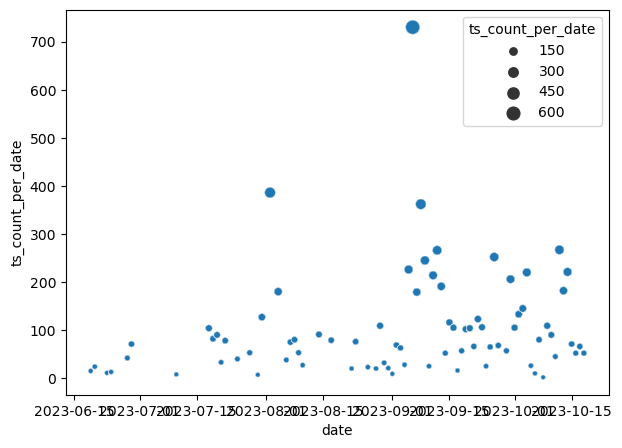

In [99]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="date", y="ts_count_per_date", data=df_audrey_ruth, size="ts_count_per_date", sizes=(10, 100), alpha=0.5)
sns.scatterplot(x="date", y="frequency_date", data=df_audrey_ruth, size="frequency_date", sizes=(10, 100), alpha=0.5)
plt.xticks(rotation="vertical")
plt.ylabel("Timestamps Count")
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Date")

In [97]:
df_audrey_ruth['month'] = pd.to_datetime(df_audrey_ruth['date']).dt.strftime('%m-%Y')
df_audrey_ruth

NameError: name 'df_audrey_ruth' is not defined

In [73]:
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='ts_count_per_month', data=df_audrey_ruth, color='violet', alpha=0.5)
sns.barplot(x='month_year', y='frequency_month', data=df_audrey_ruth, color='orange', alpha=0.5)
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Month")
plt.xlabel('Month')
plt.ylabel('Timestamp Count')
plt.show()

NameError: name 'df_audrey_ruth' is not defined

<Figure size 700x500 with 0 Axes>